In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier  
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  

In [2]:
df = pd.read_csv("data.csv")  
X = df.drop("target", axis=1)  
y = df["target"]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [3]:
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

## Logistic Regression 

In [4]:
param_log = {'C': [0.01, 0.1, 1, 10]}  
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_log, cv=5, n_jobs=-1, scoring='accuracy')  
grid_log.fit(X_train_scaled, y_train)  
y_pred_log = grid_log.predict(X_test_scaled)  
print("Accuracy:", accuracy_score(y_test, y_pred_log))  
print("Best Params:", grid_log.best_params_)  
print()  

Accuracy: 0.8837209302325582
Best Params: {'C': 0.1}



## Softmax Regression (Multiclass)  

In [5]:
param_softmax = {'C': [0.01, 0.1, 1, 10]}  
grid_softmax = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000), param_softmax, cv=5, n_jobs=-1, scoring='accuracy')  
grid_softmax.fit(X_train_scaled, y_train)  
y_pred_softmax = grid_softmax.predict(X_test_scaled)  
print("Accuracy:", accuracy_score(y_test, y_pred_softmax))  
print("Best Params:", grid_softmax.best_params_)  
print()  

Accuracy: 0.8837209302325582
Best Params: {'C': 0.1}



## Decision Tree Classifier 

In [6]:
param_dt = {'max_depth': [3, 5, 7, 10]}  
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=5, n_jobs=-1, scoring='accuracy')  
grid_dt.fit(X_train_scaled, y_train)  
y_pred_dt = grid_dt.predict(X_test_scaled)  
print("Accuracy:", accuracy_score(y_test, y_pred_dt))  
print("Best Params:", grid_dt.best_params_)  
print()  

Accuracy: 0.7674418604651163
Best Params: {'max_depth': 7}



## Random Forest Classifier  

In [7]:
param_rf = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}  
grid_rf = GridSearchCV(RandomForestClassifier(), param_rf, cv=5, n_jobs=-1, scoring='accuracy')  
grid_rf.fit(X_train_scaled, y_train)  
y_pred_rf = grid_rf.predict(X_test_scaled)  
print("Accuracy:", accuracy_score(y_test, y_pred_rf))  
print("Best Params:", grid_rf.best_params_)  
print()  

Accuracy: 0.7906976744186046
Best Params: {'max_depth': 15, 'n_estimators': 100}



## AdaBoost Classifier 

In [8]:
param_ada = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1]}  
grid_ada = GridSearchCV(AdaBoostClassifier(), param_ada, cv=5, n_jobs=-1, scoring='accuracy')  
grid_ada.fit(X_train_scaled, y_train)  
y_pred_ada = grid_ada.predict(X_test_scaled)  
print("Accuracy:", accuracy_score(y_test, y_pred_ada))  
print("Best Params:", grid_ada.best_params_)  
print()  

Accuracy: 0.8604651162790697
Best Params: {'learning_rate': 0.1, 'n_estimators': 50}



## Gradient Boosting Classifier  

In [9]:
param_gb = {  
    'n_estimators': [50, 100],  
    'max_depth': [3, 5],  
    'learning_rate': [0.01, 0.1]  
}  
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_gb, cv=5, n_jobs=-1, scoring='accuracy')  
grid_gb.fit(X_train_scaled, y_train)  
y_pred_gb = grid_gb.predict(X_test_scaled)  
print("Accuracy:", accuracy_score(y_test, y_pred_gb))  
print("Best Params:", grid_gb.best_params_)  
print()  

Accuracy: 0.8604651162790697
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}



## SVM Classifier  

In [10]:
param_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}  
grid_svm = GridSearchCV(SVC(probability=True), param_svm, cv=5, n_jobs=-1, scoring='accuracy')  
grid_svm.fit(X_train_scaled, y_train)  
y_pred_svm = grid_svm.predict(X_test_scaled)  
print("Accuracy:", accuracy_score(y_test, y_pred_svm))  
print("Best Params:", grid_svm.best_params_)  
print()  

Accuracy: 0.813953488372093
Best Params: {'C': 10, 'kernel': 'linear'}



## Voting Classifier  

In [11]:
voting = VotingClassifier(estimators=[  
    ('logistic', grid_log.best_estimator_),  
    ('random_forest', grid_rf.best_estimator_),  
    ('svm', grid_svm.best_estimator_)  
], voting='soft')  

voting.fit(X_train_scaled, y_train)  
y_pred_vote = voting.predict(X_test_scaled)  
vote_accuracy = accuracy_score(y_test, y_pred_vote)  

print("Voting Classifier Accuracy:", vote_accuracy)  
print("Confusion Matrix for Voting Classifier:")  
print(confusion_matrix(y_test, y_pred_vote))  

Voting Classifier Accuracy: 0.8837209302325582
Confusion Matrix for Voting Classifier:
[[18  2]
 [ 3 20]]


# Final Report for Voting Classifier  

In [12]:
print("\nClassification Report (Voting Classifier):")  
print(classification_report(y_test, y_pred_vote))  


Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.91      0.87      0.89        23

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.88      0.88      0.88        43



In [13]:
# Plot Accuracy Comparison  
accuracies = {  
    "Logistic Regression": accuracy_score(y_test, y_pred_log),  
    "Softmax Regression": accuracy_score(y_test, y_pred_softmax),  
    "Decision Tree": accuracy_score(y_test, y_pred_dt),  
    "Random Forest": accuracy_score(y_test, y_pred_rf),  
    "AdaBoost": accuracy_score(y_test, y_pred_ada),  
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),  
    "SVM": accuracy_score(y_test, y_pred_svm),  
    "Voting Classifier": vote_accuracy,  
}  

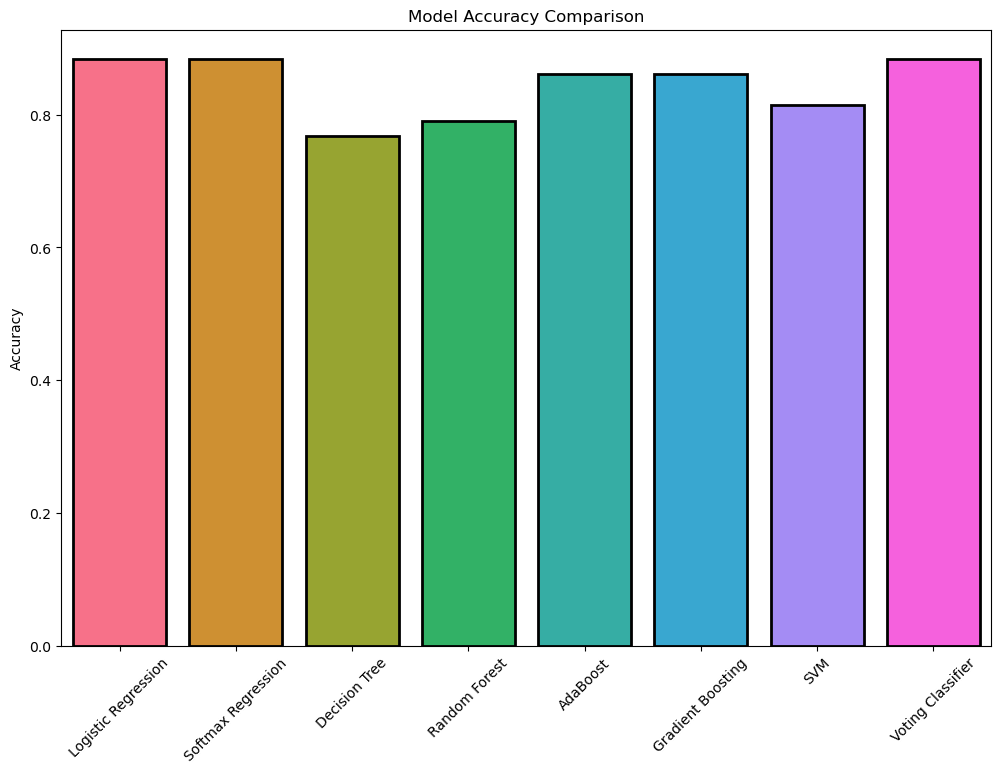

In [14]:
colors = sns.color_palette("husl", len(accuracies))
plt.figure(figsize=(12, 8))   
bar_plot = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), color='gray', edgecolor='black', linewidth=2)  # Setting the default color for bars   
for i, bar in enumerate(bar_plot.patches):  
    bar.set_facecolor(colors[i])  
plt.title("Model Accuracy Comparison")  
plt.xticks(rotation=45) 
plt.ylabel("Accuracy")    
plt.show()

### Conclusion
In this classification task, we applied a diverse set of machine learning models including Logistic Regression, Softmax Regression, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, Support Vector Machine (SVM), and a Voting Classifier. Each model was evaluated based on accuracy, with decision boundaries and relevant plots analyzed to assess performance visually and statistically.

Hyperparameter tuning was performed for the models showing promising baseline results, particularly for ensemble methods (Random Forest, AdaBoost, Gradient Boosting) and SVM, to enhance their predictive performance.

From the comparison chart, we observe that:

Logistic Regression and Softmax Regression achieved the highest accuracy (~0.89), suggesting that the dataset might be linearly separable to a significant extent.

Ensemble methods such as AdaBoost, Gradient Boosting, and the Voting Classifier also performed strongly (~0.86–0.88), benefiting from their robustness and ability to reduce overfitting.

SVM provided respectable performance (~0.82) but slightly lagged behind the top-performing models.

Decision Tree and Random Forest were comparatively less accurate (~0.74–0.77), possibly due to overfitting or insufficient parameter tuning.

Overall, the Voting Classifier, which combines multiple models, emerged as one of the top performers after hyperparameter tuning. This highlights the strength of ensemble learning in combining the predictive power of several models.